In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [3]:

# fetch_california_housing() loads the data and returns an object
housing = fetch_california_housing()

In [4]:
# Let's see what's inside this object
print("Keys in the housing object:")
print(housing.keys())
print("="*30)

Keys in the housing object:
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [5]:
# The 'DESCR' key has a full description of the dataset
print(housing.DESCR)
print("="*30)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:

# This is much easier to work with.
# The 'data' key has the features (X)
# The 'feature_names' key has the column names
# The 'target' key has the price (y)
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target (price) as a new column
# The price is in 100,000s of dollars. So 4.5 = $450,000
df['MedHouseVal'] = housing.target

In [7]:

print("First 5 rows of the data:")
print(df.head())
print("="*30)

print("Info about the columns and data types:")
df.info()

First 5 rows of the data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Info about the columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  

Plot 1: Distribution of Median House Value (MedHouseVal)


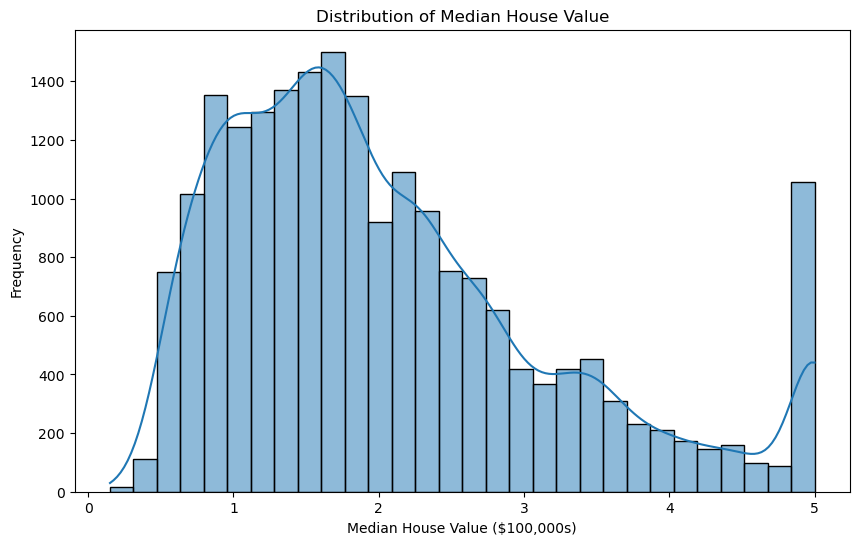

Plot 2: Correlation Heatmap of All Features


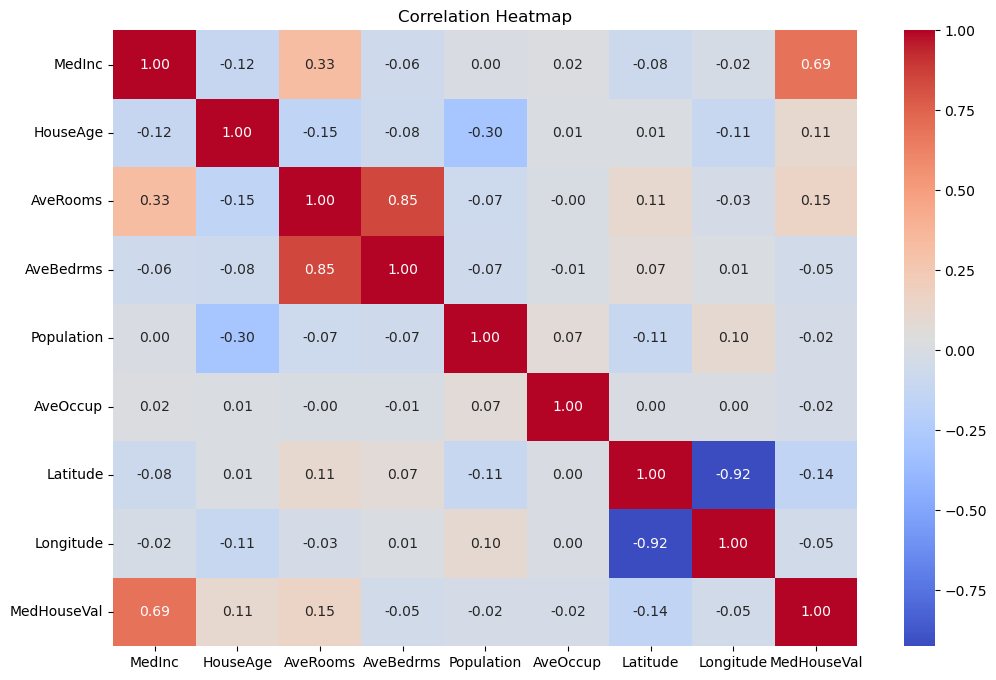

Plot 3: Histograms of All Features


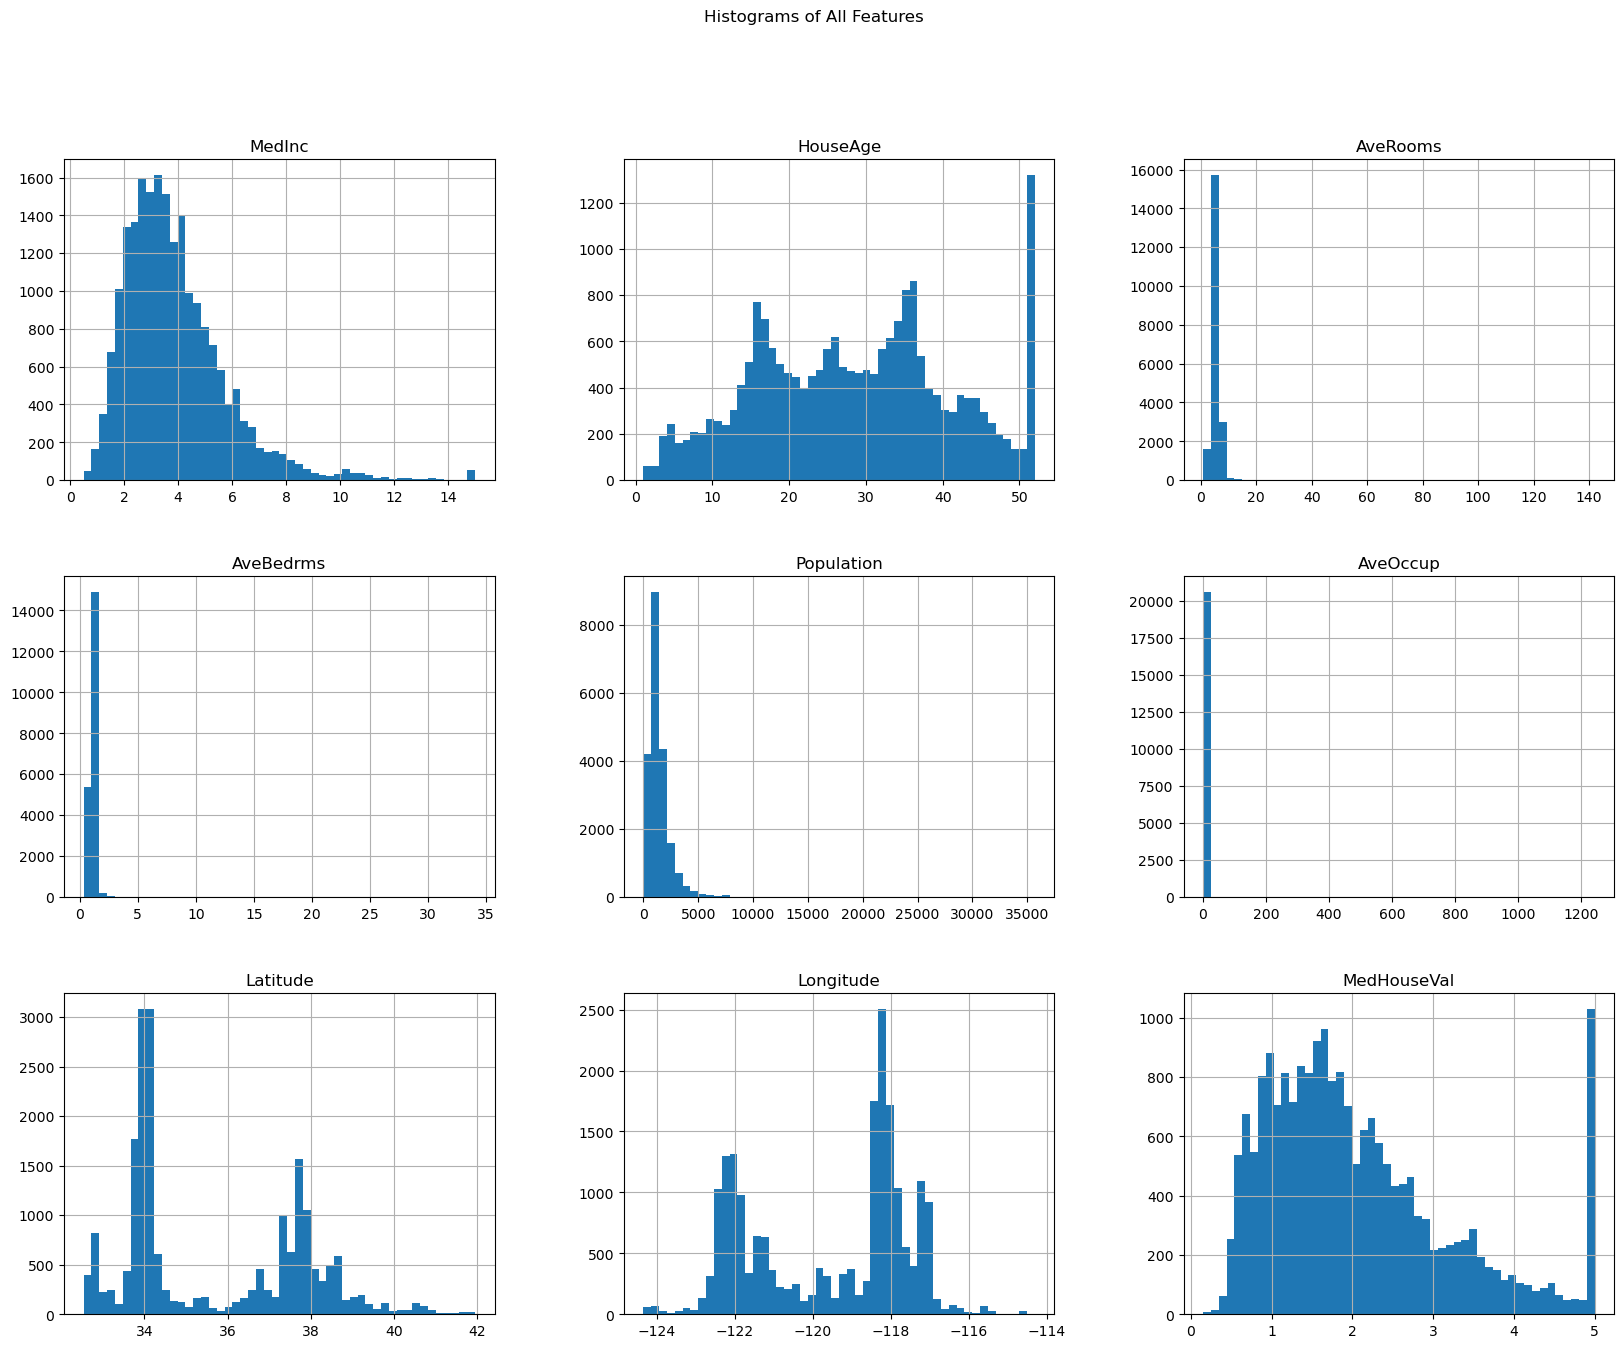

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns


print("Plot 1: Distribution of Median House Value (MedHouseVal)")
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()
print("="*30)


print("Plot 2: Correlation Heatmap of All Features")
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix
correlation_matrix = df.corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
print("="*30)


print("Plot 3: Histograms of All Features")
# Plot histograms for all columns in the DataFrame
df.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Handle the Price Cap (Task 1: Remove Capped Data) 
# We will remove the rows where MedHouseVal is 5 or more,
# as we identified this as a "cap" and not a real price.
df_cleaned = df[df['MedHouseVal'] < 5]

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing capped prices: {len(df_cleaned)}")
print("="*30)


# 3. Define Features (X) and Target (y) 
# We use the .drop() method to create our 'X' (features)
# by dropping the target column.
X = df_cleaned.drop('MedHouseVal', axis=1)

# Our 'y' (target) is just the MedHouseVal column.
y = df_cleaned['MedHouseVal']


#  4. Split Data into Training and Testing Sets 
# We split our data *before* scaling to prevent "data leakage".
# The model should only learn scaling parameters from the training data.
# test_size=0.2 means 20% of the data is saved for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("="*30)


# 5. Scale the Features (Task 2: Scale the Features) 
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform on the training data
# .fit_transform() learns the mean and std dev and then scales the data
X_train_scaled = scaler.fit_transform(X_train)

# ONLY transform the test data
# We use the mean and std dev *from the training data* to scale the test data
X_test_scaled = scaler.transform(X_test)


# === 6. Check the Results ===
# Let's look at the first 5 rows of our scaled training data
# We put it back into a DataFrame just for pretty printing
print("First 5 rows of SCALED training data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

Original number of rows: 20640
Number of rows after removing capped prices: 19648
X_train shape: (15718, 8)
X_test shape: (3930, 8)
y_train shape: (15718,)
y_test shape: (3930,)
First 5 rows of SCALED training data:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -1.283215 -0.674511 -0.312952  -0.236193   -0.134863  0.066954  1.381953   
1 -0.146519  0.524011 -0.398856  -0.245308   -0.089364 -0.042600 -1.317806   
2  0.199101  0.524011 -0.319623  -0.236161   -0.885162 -0.086865  1.065974   
3 -0.596809  1.003420  0.018036   0.099359   -0.595000 -0.010470 -0.802017   
4  1.804340  0.284307  0.902557  -0.176706   -0.722912 -0.043968  1.047387   

   Longitude  
0  -0.941677  
1   1.180228  
2  -1.475897  
3   0.631029  
4  -1.356072  


In [10]:
#  Import Models and Metrics 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#  Train Model 1: Linear Regression 
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("Linear Regression training complete.")
print("="*30)


#  Train Model 2: Random Forest Regressor =
print("Training Random Forest model...")
# n_estimators=100 means it will build 100 "trees"
# random_state=42 ensures you get the same result every time
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("Random Forest training complete.")
print("="*30)


#  Evaluate the Models 
print("Evaluating models on the TEST data...")
# Make predictions on the test set
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Calculate the error
# We use Mean Squared Error (MSE) and then take the square root (RMSE)
# RMSE is good because it's in the same units as our target (price)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f"Linear Regression RMSE:  ${lr_rmse:,.4f} (in $100,000s)")
print(f"Random Forest RMSE:      ${rf_rmse:,.4f} (in $100,000s)")

Training Linear Regression model...
Linear Regression training complete.
Training Random Forest model...
Random Forest training complete.
Evaluating models on the TEST data...
Linear Regression RMSE:  $0.6429 (in $100,000s)
Random Forest RMSE:      $0.4653 (in $100,000s)




**Linear Regression RMSE: $0.6429** (On average, off by ~$64,290)

**Random Forest RMSE: $0.4653** (On average, off by ~$46,530)

This tells us the Random Forest model is significantly more accurate. It is the clear "winner" and the one we will use for our web application

In [11]:
#  Import joblib 
import joblib

# Save the Random Forest Model 
# This file will contain our best-performing model
joblib.dump(rf_model, 'california_housing_model.pkl')

# Save the Scaler 
# This file contains the mean and std dev from our training data
joblib.dump(scaler, 'scaler.pkl')

#  Save the column names 
# This is a good practice to ensure we build our app with the
# exact same features in the same order.
joblib.dump(X.columns, 'model_columns.pkl')

print("Model, scaler, and columns have been saved to files:")
print("- california_housing_model.pkl")
print("- scaler.pkl")
print("- model_columns.pkl")

Model, scaler, and columns have been saved to files:
- california_housing_model.pkl
- scaler.pkl
- model_columns.pkl
